<a href="https://colab.research.google.com/github/DenisKozachok/learnGenAi/blob/lesson4/Lesson4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Трансформації для нормалізації та аугментації даних
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Віддзеркалення
    transforms.RandomCrop(32, padding=4),  # Обрізання з відступом
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))  # Нормалізація
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Завантаження навчального набору даних
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

# Завантаження тестового набору даних
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=2)

classes = ('Літак', 'Автомобіль', 'Птах', 'Кішка', 'Олень',
           'Собака', 'Жаба', 'Кінь', 'Корабель', 'Вантажівка')


100%|██████████| 170M/170M [00:06<00:00, 24.6MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Створюю CNN

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Перший блок згортки
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, 2)

        # Другий блок згортки
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, 2)

        # Третій блок згортки
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(2, 2)

        # Повнозв'язні шари
        self.fc1 = nn.Linear(128 * 4 * 4, 128)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)  # 10 класів для CIFAR-10

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)  # Розгортання тензора
        x = self.relu4(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()


In [4]:
criterion = nn.CrossEntropyLoss()  # Функція втрат

optimizer = optim.Adam(net.parameters(), lr=0.001)  # Оптимізатор


In [5]:
num_epochs = 10
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Оцінка на тестовому наборі
    net.eval()
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss = test_loss / len(testloader)
    test_accuracy = 100 * correct / total
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f'Епоха {epoch+1}/{num_epochs}, '
          f'Втрата навчання: {train_loss:.3f}, Точність навчання: {train_accuracy:.2f}%, '
          f'Втрата тесту: {test_loss:.3f}, Точність тесту: {test_accuracy:.2f}%')

print('Навчання завершено')


Епоха 1/10, Втрата навчання: 1.592, Точність навчання: 41.58%, Втрата тесту: 1.253, Точність тесту: 54.91%
Епоха 2/10, Втрата навчання: 1.217, Точність навчання: 56.22%, Втрата тесту: 1.082, Точність тесту: 61.33%
Епоха 3/10, Втрата навчання: 1.038, Точність навчання: 63.15%, Втрата тесту: 0.938, Точність тесту: 67.05%
Епоха 4/10, Втрата навчання: 0.932, Точність навчання: 67.17%, Втрата тесту: 0.810, Точність тесту: 71.45%
Епоха 5/10, Втрата навчання: 0.846, Точність навчання: 70.26%, Втрата тесту: 0.798, Точність тесту: 72.63%
Епоха 6/10, Втрата навчання: 0.792, Точність навчання: 72.02%, Втрата тесту: 0.715, Точність тесту: 75.38%
Епоха 7/10, Втрата навчання: 0.741, Точність навчання: 73.94%, Втрата тесту: 0.759, Точність тесту: 73.67%
Епоха 8/10, Втрата навчання: 0.710, Точність навчання: 74.96%, Втрата тесту: 0.667, Точність тесту: 77.15%
Епоха 9/10, Втрата навчання: 0.683, Точність навчання: 76.00%, Втрата тесту: 0.675, Точність тесту: 76.68%
Епоха 10/10, Втрата навчання: 0.656, 

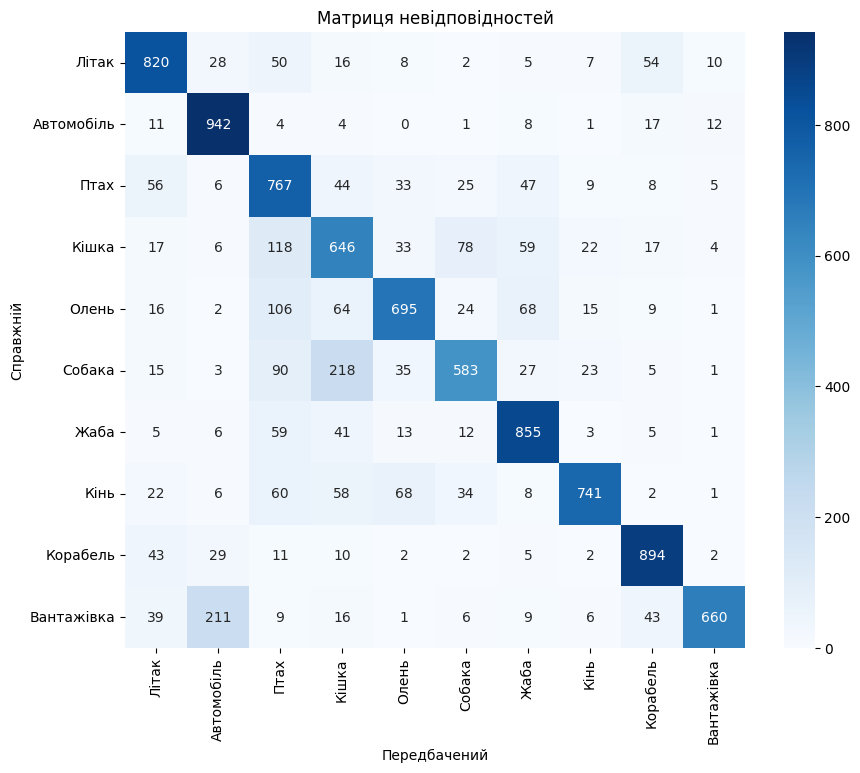

In [6]:
# Побудова матриці невідповідностей
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Передбачення на тестовому наборі
all_preds = []
all_labels = []

net.eval()
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Передбачений')
plt.ylabel('Справжній')
plt.title('Матриця невідповідностей')
plt.show()


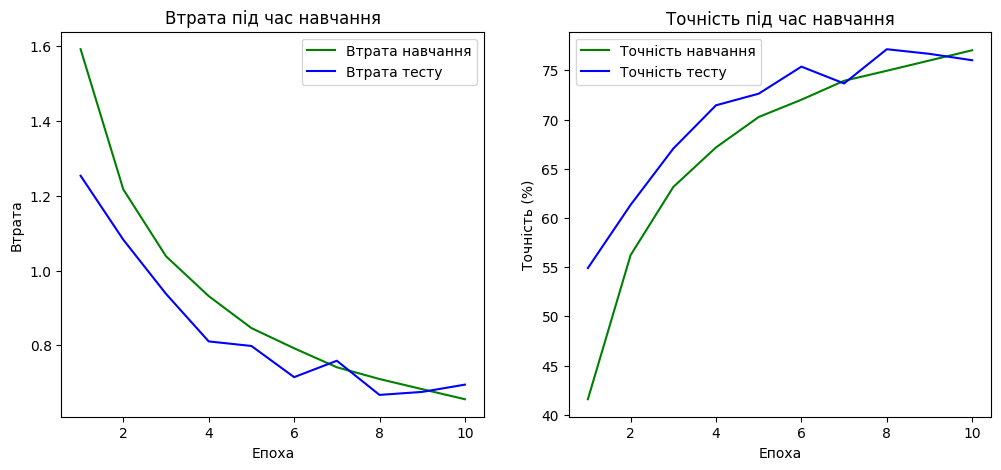

In [7]:
epochs = range(1, num_epochs+1)

plt.figure(figsize=(12,5))

# Втрати
plt.subplot(1,2,1)
plt.plot(epochs, train_losses, 'g-', label='Втрата навчання')
plt.plot(epochs, test_losses, 'b-', label='Втрата тесту')
plt.title('Втрата під час навчання')
plt.xlabel('Епоха')
plt.ylabel('Втрата')
plt.legend()

# Точність
plt.subplot(1,2,2)
plt.plot(epochs, train_accuracies, 'g-', label='Точність навчання')
plt.plot(epochs, test_accuracies, 'b-', label='Точність тесту')
plt.title('Точність під час навчання')
plt.xlabel('Епоха')
plt.ylabel('Точність (%)')
plt.legend()

plt.show()


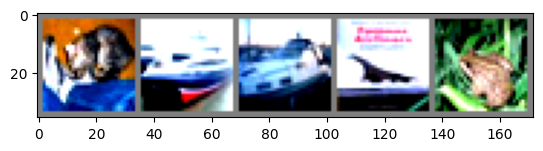

Справжні: Кішка | Корабель | Корабель | Літак |  Жаба
Передбачені: Кішка | Корабель | Автомобіль | Корабель |  Жаба


In [9]:
# Візуалізація деяких передбачень
dataiter = iter(testloader)
images, labels = next(dataiter)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

# Функція для відображення зображень
def imshow(img):
    img = img / 2 + 0.5  # Де-нормалізація
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Показати перші 5 зображень з передбаченнями
imshow(torchvision.utils.make_grid(images[:5]))
print('Справжні:', ' | '.join('%5s' % classes[labels[j]] for j in range(5)))
print('Передбачені:', ' | '.join('%5s' % classes[predicted[j]] for j in range(5)))


RNN

In [21]:
import requests

# URL тексту Шекспіра на Project Gutenberg
url = 'https://www.gutenberg.org/files/100/100-0.txt'

response = requests.get(url)
text = response.text

# Збереження тексту у файл 'shakespeare.txt'
with open('shakespeare.txt', 'w', encoding='utf-8') as f:
    f.write(text)


In [22]:
# Завантаження тексту з файлу
with open('shakespeare.txt', 'r', encoding='utf-8') as f:
    text = f.read()


In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import requests


In [24]:
# Завантаження тексту Шекспіра
url = 'https://www.gutenberg.org/files/100/100-0.txt'
response = requests.get(url)
text = response.text

# Використання лише першого мільйона символів для зменшення розміру
text = text[:1000000]

# Створення словника символів
chars = tuple(set(text))
int2char = dict(enumerate(chars))
char2int = {ch: ii for ii, ch in int2char.items()}

# Перетворення тексту в індекси
encoded = np.array([char2int[ch] for ch in text])


In [25]:
# Функція one_hot_encode
def one_hot_encode(arr, n_labels):
    # Ініціалізація матриці результатів
    one_hot = np.zeros((arr.size, n_labels), dtype=np.float32)

    # Розміщення одиниць у відповідних позиціях
    one_hot[np.arange(one_hot.shape[0]), arr.flatten()] = 1.

    # Відновлення форми до (batch_size, seq_length, n_labels)
    one_hot = one_hot.reshape((*arr.shape, n_labels))

    return one_hot

# Функція для отримання батчів
def get_batches(arr, batch_size, seq_length):
    total_batch_size = batch_size * seq_length
    n_batches = len(arr) // total_batch_size

    # Відкидаємо зайві дані
    arr = arr[:n_batches * total_batch_size]
    arr = arr.reshape((batch_size, -1))

    for n in range(0, arr.shape[1], seq_length):
        x = arr[:, n:n+seq_length]
        y = np.zeros_like(x)
        try:
            y[:, :-1], y[:, -1] = x[:, 1:], arr[:, n+seq_length]
        except IndexError:
            y[:, :-1], y[:, -1] = x[:, 1:], arr[:, 0]
        yield x, y


In [26]:
class CharRNN(nn.Module):
    def __init__(self, tokens, n_hidden=256, n_layers=2, drop_prob=0.5):
        super(CharRNN, self).__init__()
        self.chars = tokens
        self.int2char = int2char
        self.char2int = char2int
        self.n_hidden = n_hidden
        self.n_layers = n_layers

        self.lstm = nn.LSTM(len(self.chars), n_hidden, n_layers,
                            dropout=drop_prob, batch_first=True)
        self.dropout = nn.Dropout(drop_prob)
        self.fc = nn.Linear(n_hidden, len(self.chars))

    def forward(self, x, hidden):
        r_output, hidden = self.lstm(x, hidden)
        out = self.dropout(r_output)
        out = out.contiguous().view(-1, self.n_hidden)
        out = self.fc(out)
        return out, hidden

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        hidden = (weight.new(self.n_layers, batch_size, self.n_hidden).zero_().to(device),
                  weight.new(self.n_layers, batch_size, self.n_hidden).zero_().to(device))
        return hidden


In [27]:
batch_size = 128
seq_length = 100
n_epochs = 10

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = CharRNN(chars, n_hidden=512, n_layers=2)
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for epoch in range(n_epochs):
    h = model.init_hidden(batch_size)
    total_loss = 0
    for x, y in get_batches(encoded, batch_size, seq_length):
        x = one_hot_encode(x, len(chars))
        inputs = torch.from_numpy(x).to(device)
        targets = torch.from_numpy(y).to(device)

        h = tuple([e.data for e in h])
        model.zero_grad()
        output, h = model(inputs, h)
        loss = criterion(output, targets.view(batch_size * seq_length).long())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / (len(encoded) // (batch_size * seq_length))
    print(f'Епоха: {epoch+1}/{n_epochs}... Втрата: {avg_loss:.4f}')

print('Навчання завершено')


Епоха: 1/10... Втрата: 3.4511
Епоха: 2/10... Втрата: 3.2377
Епоха: 3/10... Втрата: 2.7959
Епоха: 4/10... Втрата: 2.4484
Епоха: 5/10... Втрата: 2.2619
Епоха: 6/10... Втрата: 2.1473
Епоха: 7/10... Втрата: 2.0573
Епоха: 8/10... Втрата: 1.9839
Епоха: 9/10... Втрата: 1.9205
Епоха: 10/10... Втрата: 1.8665
Навчання завершено


In [29]:
def predict(model, char, h=None, top_k=None):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    x = np.array([[char2int[char]]])
    x = one_hot_encode(x, len(chars))
    inputs = torch.from_numpy(x).to(device)

    if h is None:
        h = model.init_hidden(1)
    else:
        h = tuple([each.data for each in h])
    output, h = model(inputs, h)

    p = F.softmax(output, dim=1).data
    p = p.cpu()
    if top_k is None:
        top_ch = np.arange(len(chars))
    else:
        p, top_ch = p.topk(top_k)
        top_ch = top_ch.numpy().squeeze()
    p = p.numpy().squeeze()
    char = np.random.choice(top_ch, p=p/p.sum())
    return int2char[char], h

def sample(model, size, prime='The', top_k=None):
    model.eval()
    chars_sampled = [ch for ch in prime]
    h = model.init_hidden(1)
    for ch in prime:
        char, h = predict(model, ch, h, top_k=top_k)
    chars_sampled.append(char)
    for _ in range(size):
        char, h = predict(model, chars_sampled[-1], h, top_k=top_k)
        chars_sampled.append(char)
    return ''.join(chars_sampled)

# Генерація тексту
print(sample(model, 1000, prime='To be, or not to be,', top_k=5))


To be, or not to be, that werle to streak.

ARVARLAN.
I wouth the mast on thy with a dats,
Than the shoult then his to bettrow. The cillate,
And make the crarined time, the mir and,
Thas to bather stand to some that thou wind it have woret
To she hars think to the merthy the werst his she
If sharl the parioss to sinch the watter
As in him hand have his me mant heart in hear
The comman my sorsithen the comes
Thee weith and me hat sear, and and sim,
Thandire it, thy singer.

 [_Exeunt._]


COMINI.
The carmole our singly, art man arl aspeen
That the made thou wort the sare it
Wo am my loss offered. The bean, an the come,
And this watene ho moul hear houll
And and the words and thene of as thas the cancing.
Thes, though tomar singrous, and and makn the brating
Take hert of home see so shall wile
And these and to thou and his with
Whe som then sonter all and tries the parce,
Ther, which’st my me thines tame toned,
And to me tree shore on mome that andender,
As take and here, and a s


In [31]:
# Генерація тексту
print(sample(model, 1000, prime='To be, or not to be,', top_k=10))

To be, or not to be, we shall fat ourten,
He heod, thes hakn thim stues of be to heath
What you hee as sprant trome the simse
Thin ound ta halve of wich of thome.
Tale to bens seamend, but you walls they hit betwer,
Hout by speeconithing the hound
And thee be chould folly. Apreaty; hes takies,
Thy maturys. Indim of a canliin thou hing besads.

ANTOPHOMAO.
Yre sore is not?

SLENID.
The miss asate wonture thou some of.

CORATIUS.
You whith then?

PLOSOL.
This mary and incrampey, and weer
Have yir, firnther,
But that sprase tom though as helr will his
a comnot, treef whet sar and
That she me but mose ame.

BROTAL.
We shas, and I, you som the sum to love the
Ane me a to my adn then with som
The wett and ste co besce of owere;
In thou all buce brige tloog of and witham
Brealt and till shath thou,
This. Wils at the werch timens who mange to canse.
Me sour will ye centires, where well, ary me of and it ant to by tim, by tous.

CLEIPATA..
Nar.

 [_Shearin._]

DICINIUS.
S to 


In [32]:
# Генерація тексту
print(sample(model, 1000, prime='To be, or not to be,', top_k=20))

To be, or not to be,
Sarst the not bedpring to shaed tere wiil. The lock.
Y’t her dets swaciin’r saam my for,
Or thall in ateth my whor’s s rewer to thou as to,
And of him your and os ip sterled
Matided ig indangiemt, and thoumery me arder, the pore,
Whes I that swe thou mantey atsoued, in my danoth withy, and defeante toy corbere,
On elless tas seef thee, not sa comes,
The hich miterey the agost not,
Ard at it the worth of colncuas me sot
Withit? I had it so fil.

ONTHOMDOE.
PETino will the accacter on and some.

MASTONR.
Never I worls of it go is for my manthes haves erefores
Thenean if ass me cood not sikiof your hars
Sreocis bieds macy for anving.
 s ender sy glad swance.

LERAN._ [_Enith_.
Hreithling wims sactiy of the mean’s
With bay is af ulich thlow not bod,

 Enter Corpopnos. Silting.


Enter welllod.
Domes fercobby not lims at in but no besiegs to te moment,
You fim pareince! Thit tat unders had
Ig that cisnaunsich lock that the hand heone,
Or sats theik willss arm
